In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Loading the data and Using HashingVectorizer to encode the text into sparse features

In [3]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

vectorizer = HashingVectorizer(n_features=1000000000, binary=True, norm=None)
features = vectorizer.fit_transform(data['target_names'])
print(features[0:2])
print('----')
print(features.shape)

  (0, 379076818)	1.0
  (0, 571520356)	1.0
  (1, 18406378)	1.0
  (1, 82211069)	1.0
----
(20, 1000000000)


In [4]:
text, label = data['data'][5], data['target_names'][data['target'][0]]
print(data['target_names'])
labels = data.target
true_k = np.unique(labels).shape[0]
print('true_k =', true_k)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
true_k = 20


Splitting data into train and test

In [5]:
data_train = fetch_20newsgroups(subset='train', 
                                shuffle=True, random_state=42)
labels = data_train.target

# Convert to TF-IDF format
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(data_train.data)

In [6]:
data_test = fetch_20newsgroups(subset='test',
                               shuffle=True, random_state=42)
# Split a train set and test set
y_train, y_test = data_train.target, data_test.target

X_test = vectorizer.transform(data_test.data)

In [7]:
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(11314, 130107) (11314,)
(7532, 130107) (7532,)


In [8]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [9]:
lr_pred = lr_clf.predict(X_train)
train_score = accuracy_score(y_train, lr_pred) * 100
R_squared1 = r2_score(lr_pred, y_train)
print((f"Train accuracy score: {train_score:.2f}%,"),'R squared on train set is', R_squared1)

lr_pred = lr_clf.predict(X_test)
test_score = accuracy_score(y_test, lr_pred) * 100
R_squared = r2_score(lr_pred, y_test)
print((f"Test accuracy score: {test_score:.2f}%,"),'R squared on test set is', R_squared)

Train accuracy score: 97.61%, R squared on train set is 0.9526864700721841
Test accuracy score: 82.74%, R squared on test set is 0.6538168757487586


In [10]:
pred_train_lr=lr_clf.predict(X_train)
print("Mean squared error-train is", np.sqrt(mean_squared_error(y_train, pred_train_lr)))

pred_test_lr= lr_clf.predict(X_test)
print("Mean squared error-test is", np.sqrt(mean_squared_error(y_test, pred_test_lr)))

Mean squared error-train is 1.2060187286137036
Mean squared error-test is 3.2051679260035817


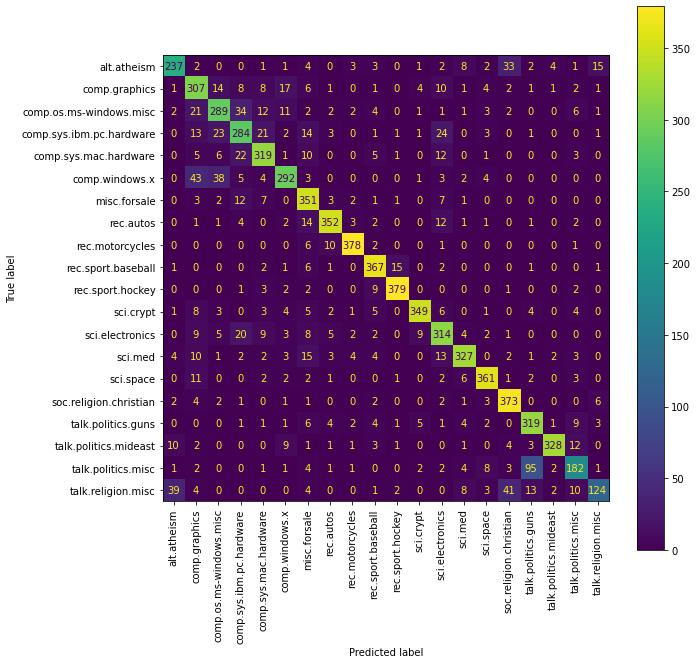

In [11]:
cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data_train.target_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='viridis')

plt.show()

Ridge regression L2

In [14]:
rr = Ridge(alpha=3)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("Mean squared error-train is", np.sqrt(mean_squared_error(y_train, pred_train_rr)))
print("R squared on train set is", r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print("Mean squared error-test is", np.sqrt(mean_squared_error(y_test, pred_test_rr))) 
print("R squared on test set is", r2_score(y_test, pred_test_rr))

Mean squared error-train is 2.4061734561560213
R squared on train set is 0.8128809562632899
Mean squared error-test is 3.4636856041565767
R squared on test set is 0.6123213506765512


Lasso L1

In [13]:
model_lasso = Lasso(alpha=0.02)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("Mean squared error-train is", np.sqrt(mean_squared_error(y_train,pred_train_lasso )))
print("R squared on train set is", r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print("Mean squared error-test is", np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("R squared on train set is", r2_score(y_test, pred_test_lasso))

Mean squared error-train is 5.1134495189175135
R squared on train set is 0.15493119186474003
Mean squared error-test is 5.1144904831896625
R squared on train set is 0.154721730574233


As a result, we see that L1 Lasso is the worst and inappropriate model. So we should use logistic regression